In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../../../')

In [87]:
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from config import STOCKTWITS_TICKER_LIST
from util.file_util import (
    StockTwitsFileReader, StockDataFileReader
)
from util.plot_util import plot_twit_series_for_ticker
from util.ts_util import resample_weekly

In [4]:
twit_file_reader = StockTwitsFileReader()

In [43]:
start_date = '2017-01-01'
end_date = '2019-08-10'

In [73]:
avg_twits = []

for t in STOCKTWITS_TICKER_LIST:
    twit_df = twit_file_reader.read_daily_sentiment_summary_prelim(t,
                                                                   start_date=start_date,
                                                                   end_date=end_date)
    
    avg_twits.append({
        'ticker': t,
        'avg_daily_twit': twit_df.sum(axis=1).mean(),
        'median_daily_twit': twit_df.sum(axis=1).median(),
    })
    
avg_twits = pd.DataFrame(avg_twits)

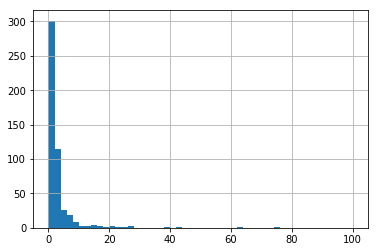

In [77]:
avg_twits['median_daily_twit'].hist(range=(0, 100), bins=50)

### Let's try looking at tickers that have daily median >= 2 Twits 

In [82]:
filtered_twits = avg_twits[avg_twits['median_daily_twit'] >= 2]

In [83]:
filtered_twits.shape

(201, 3)

In [86]:
filtered_tickers = filtered_twits['ticker'].tolist()

In [88]:
with open('ticker_at_least_2_median.pkl', 'wb') as f:
    pickle.dump(filtered_tickers, f)

### Example of Weekly Twits and Stock Overlayed

In [56]:
ticker = 'HBAN'

/Users/seung-jae_bang/.virtualenvs/my_research/lib/python3.6/site-packages/matplotlib/legend.py:1270: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword arguments, some "


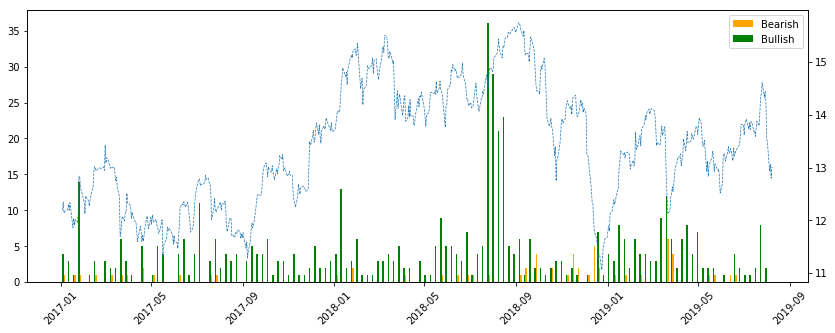

In [57]:
plot_twit_series_for_ticker(ticker,
                            start_date,
                            end_date)